In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
sns.set_style("darkgrid", {"grid.color": "0.6", "grid.linestyle": ":"})
cf.go_offline


<function cufflinks.offline.go_offline(connected=None)>

In [118]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot: >

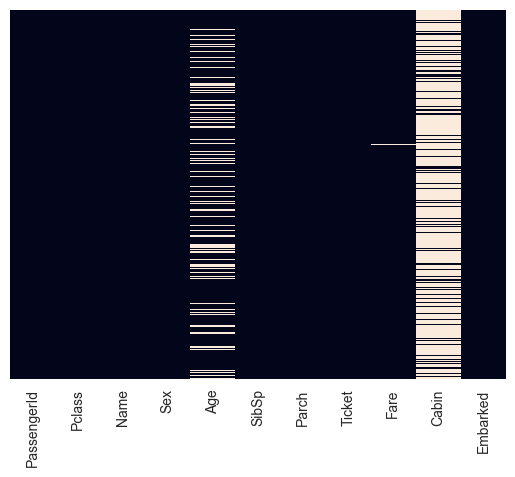

In [119]:
# sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)


<AxesSubplot: xlabel='Survived', ylabel='count'>

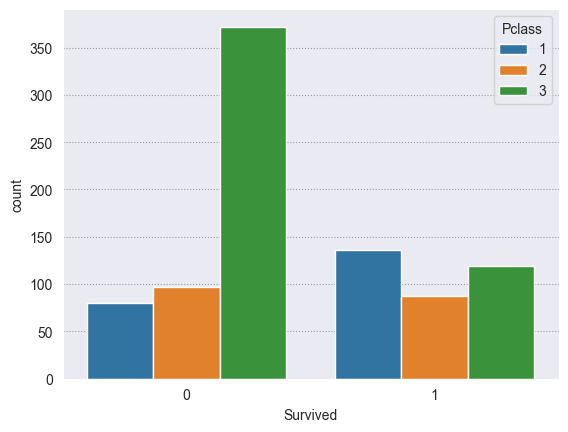

In [120]:
sns.countplot(x="Survived", data=train, hue="Pclass")


<AxesSubplot: xlabel='Age', ylabel='Count'>

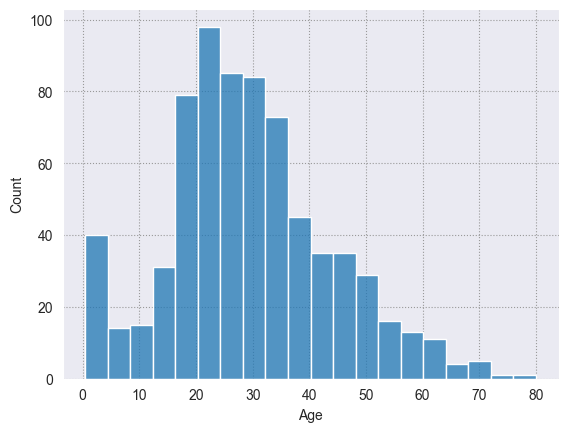

In [121]:
sns.histplot(train["Age"].dropna())


<AxesSubplot: xlabel='SibSp', ylabel='count'>

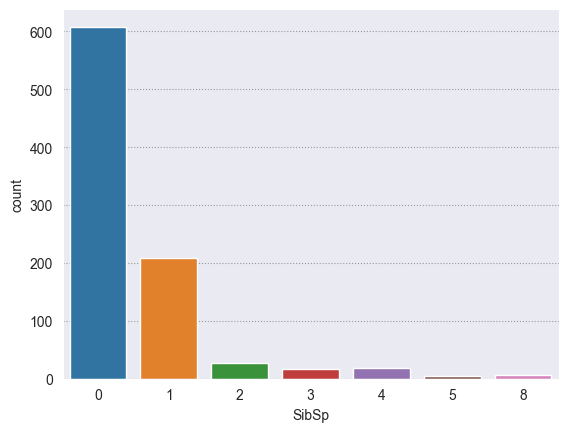

In [122]:
sns.countplot(x="SibSp", data=train)


<AxesSubplot: >

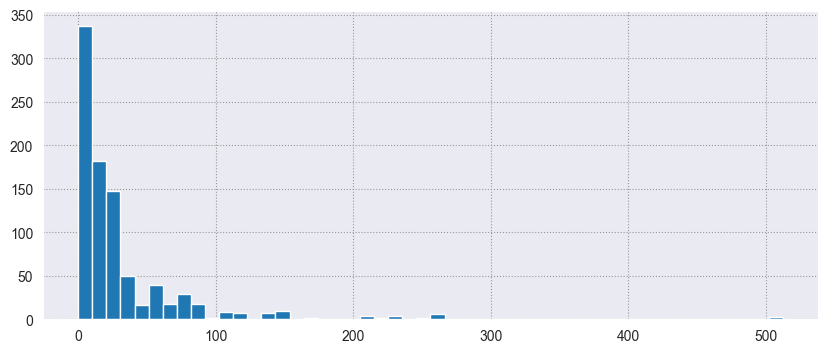

In [123]:
train["Fare"].hist(figsize=(10, 4), bins=50)


<AxesSubplot: xlabel='Pclass', ylabel='Age'>

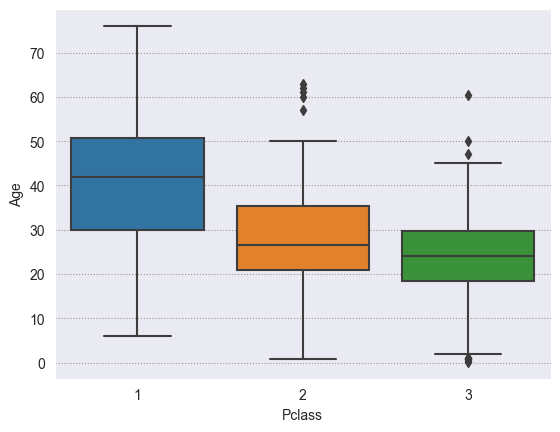

In [124]:
# sns.boxplot(x="Pclass", y="Age", data=train)
sns.boxplot(x="Pclass", y="Age", data=test)


In [125]:
train.groupby(by="Pclass")["Age"].mean()


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [126]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


def impute_age2(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 41
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


In [127]:
train["Age"] = train[["Age", "Pclass"]].apply(impute_age, axis=1)
test["Age"] = test[["Age", "Pclass"]].apply(impute_age2, axis=1)


<AxesSubplot: >

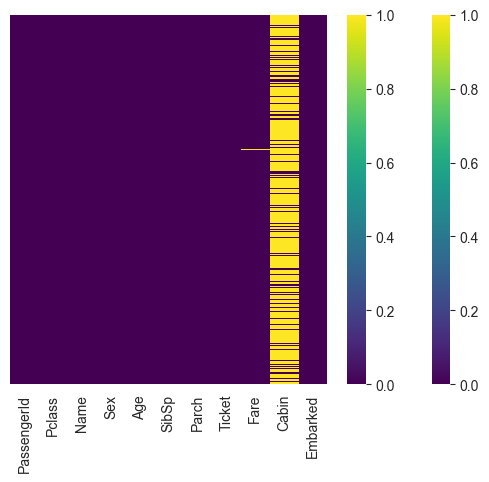

In [128]:
sns.heatmap(train.isnull(), yticklabels=False, cmap="viridis")
sns.heatmap(test.isnull(), yticklabels=False, cmap="viridis")


In [129]:
train.drop("Cabin", axis=1, inplace=True)
test.drop("Cabin", axis=1, inplace=True)


In [130]:
train.dropna(inplace=True)
test.dropna(inplace=True)


In [131]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [132]:
sex = pd.get_dummies(train["Sex"], drop_first=True)
embark = pd.get_dummies(train["Embarked"],drop_first=True)
sex1 = pd.get_dummies(test["Sex"], drop_first=True)
embark1 = pd.get_dummies(test["Embarked"],drop_first=True)


In [133]:
train = pd.concat([train, sex, embark], axis=1)
test = pd.concat([test, sex1, embark1], axis=1)



In [134]:
train.drop(["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)
test.drop(["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)


In [135]:
train.drop("PassengerId", axis=1, inplace=True)
test.drop("PassengerId", axis=1, inplace=True)


In [136]:
print(test.head())
train.head()


   Pclass   Age  SibSp  Parch     Fare  male  Q  S
0       3  34.5      0      0   7.8292     1  1  0
1       3  47.0      1      0   7.0000     0  0  1
2       2  62.0      0      0   9.6875     1  1  0
3       3  27.0      0      0   8.6625     1  0  1
4       3  22.0      1      1  12.2875     0  0  1


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [19]:
x = train.drop("Survived", axis=1)
y = train["Survived"]


In [138]:
# x_train, x_test, y_train, y_test = train_test_split(
#     x, y, test_size=0)


In [22]:
logmodel = LogisticRegression()


In [139]:
logmodel.fit(x, y)


c:\Users\ayush\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [140]:
pred = logmodel.predict(test)


In [27]:
# print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [28]:
# print(confusion_matrix(y_test, pred))


[[147  16]
 [ 30  74]]


In [144]:
print(len(pred))
test.count()


417


Pclass    417
Age       417
SibSp     417
Parch     417
Fare      417
male      417
Q         417
S         417
dtype: int64